<a href="https://colab.research.google.com/github/ShabnaIlmi/SpamSense-AI/blob/main/Merging_the_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing the Relevant Libaries**

In [ ]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
import pickle

# **Mounting the Google Drive**

In [ ]:
# Mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Loading the Datasets**

In [ ]:
# Defining the file path
file_path_true = "/content/drive/MyDrive/Multi-Type-Spam-Detection/Dataset/True_Cleaned.csv"

# Loading the dataset with the correct delimiter (semicolon)
data_true = pd.read_csv(file_path_true, encoding="utf-8")

In [ ]:
# Defining the file path
file_path_false = "/content/drive/MyDrive/Multi-Type-Spam-Detection/Dataset/Fake_Cleaned.csv"

# Loading the dataset with the correct delimiter (semicolon)
data_fake = pd.read_csv(file_path_false, encoding="utf-8")

In [ ]:
# Displaying the datasets head
data_true.head()

,title,text,subject,status
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,Not Spam
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,Not Spam
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,Not Spam
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,Not Spam
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,Not Spam


In [ ]:
data_fake.head()

,title,text,subject,status
0,Donald Trump Sends Out Embarrassing New Year’s...,Donald Trump just couldn t wish all Americans ...,News,Spam
1,Drunk Bragging Trump Staffer Started Russian C...,House Intelligence Committee Chairman Devin Nu...,News,Spam
2,Sheriff David Clarke Becomes An Internet Joke ...,"On Friday, it was revealed that former Milwauk...",News,Spam
3,Trump Is So Obsessed He Even Has Obama’s Name ...,"On Christmas day, Donald Trump announced that ...",News,Spam
4,Pope Francis Just Called Out Donald Trump Duri...,Pope Francis used his annual Christmas Day mes...,News,Spam


In [ ]:
# Merging both the Datasets
data = pd.concat([data_true, data_fake], axis=0)

In [ ]:
# Displaying Dataset Information
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44666 entries, 0 to 23454
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44666 non-null  object
 1   text     44035 non-null  object
 2   subject  44666 non-null  object
 3   status   44666 non-null  object
dtypes: object(4)
memory usage: 1.7+ MB


# **Exploratatry Data Analysis**

# **Identifying Categorical and Numerical Columns**

In [ ]:
# Identifying Categorical and Numerical Columns
categorical_columns = data.select_dtypes(include=['object']).columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# **Categorical Features**

In [ ]:
# Displaying the Categorical Features
print("\nCategorical Features:\n")
print(categorical_columns)


Categorical Features:

Index(['title', 'text', 'subject', 'status'], dtype='object')


**Unique Values and Their Counts Relevant to Each categorical Feature**

In [ ]:
# Displaying the Unique Values and Their Counts Relevant to Each Categorical Column
print("Unique values and their count relevant to each categorical feature:\n")
for column in categorical_columns:
    unique_values = data[column].unique()
    value_counts = data[column].value_counts()
    print(value_counts)
    print(" ")

Unique values and their count relevant to each categorical feature:

title
Factbox: Trump fills top jobs for his administration                                   14
Factbox: Contenders for senior jobs in Trump's administration                           8
Factbox: International reaction to arrest of Reuters reporters in Myanmar               6
Factbox: Contenders, picks for key jobs in Trump's administration                       5
Timeline: Zika's origin and global spread                                               4
                                                                                       ..
Factbox: Japanese emperor Akihito worked to console the people, reconcile with Asia     1
Bolivia's Morales says he'll seek fourth term, spurs protests                           1
North Korea images suggest missile capable of hitting all America: U.S. experts         1
China customs handles 2,773 cases of smuggling from January-October: paper              1
A Troubled King: Chicago’

# **Numerical Features**

In [ ]:
# Displaying the Numerical Features
print("\nNumerical Features:\n")
print(numerical_columns)


Numerical Features:

Index([], dtype='object')


# **Visualization of the Target Variable**

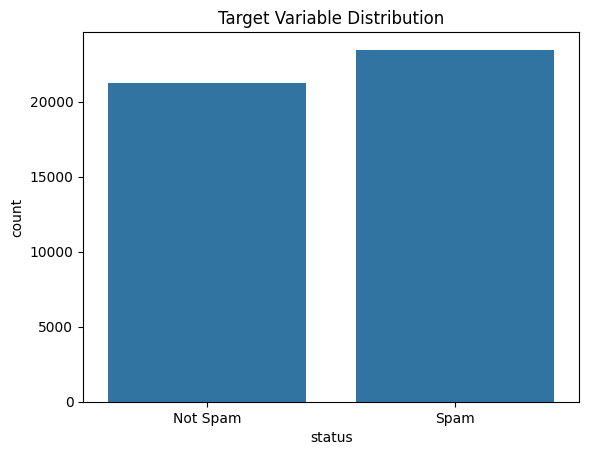

In [ ]:
# Visualization of the Distribution of the Target Variable
sns.countplot(data=data, x='status')
plt.title('Target Variable Distribution')
plt.show()

# **Data Preprocessing**

**Handling the null values in the dataset.**

In [ ]:
# Step 1: Dropping the null values in the text column
data.dropna(subset=['text'], inplace=True)

In [ ]:
# Step 2: Dropping the 'subject' column
data.drop(columns=['subject'], inplace=True)

In [ ]:
# Displaying Dataset Information
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44035 entries, 0 to 23454
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   44035 non-null  object
 1   text    44035 non-null  object
 2   status  44035 non-null  object
dtypes: object(3)
memory usage: 1.3+ MB


# **Categorical Columns**

# **Data Encoding**

**Applying Label Encoding for the
Categorical Columns**

In [ ]:
# Step 2: Encoding the Categorical Column
from sklearn.preprocessing import LabelEncoder
import pickle
import os

# Google Drive Path
save_path = "/content/drive/MyDrive/Multi-Type-Spam-Detection/Dataset/"

# Listing the columns for encoding
categorical_features = data.select_dtypes(include=['object']).columns

# Encoding the categorical features
label_encoders = {}

for feature in categorical_features:
    label_encoder = LabelEncoder()
    data[feature] = label_encoder.fit_transform(data[feature])
    label_encoders[feature] = label_encoder  # Store the encoder

# Check if directory exists, if not, create it
if not os.path.exists(save_path):
    os.makedirs(save_path)

# Save the encoders
encoder_file = os.path.join(save_path, 'label_encoders.pkl')
with open(encoder_file, 'wb') as file:
    pickle.dump(label_encoders, file)

print(f"Label Encoding Applied and Encoders Saved Successfully at: {encoder_file} 🎯")

KeyboardInterrupt: Interrupted by user

In [ ]:
# Displaying dataset Information
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44035 entries, 0 to 23454
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   title   44035 non-null  int64
 1   text    44035 non-null  int64
 2   status  44035 non-null  int64
dtypes: int64(3)
memory usage: 1.3 MB


In [ ]:
# Step 3: Splitting the Target Variables and the Features
X = data.drop(columns=['status'])
y = data['status']

In [ ]:
# Step 4: Standardizing the Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Step 4: Splitting the Training and the Testing the Datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **The Target Variable**

In [ ]:
# Displaying the Distribution of the 'status' Variable
y.value_counts(normalize=True)

,proportion
status,
1,0.518338
0,0.481662


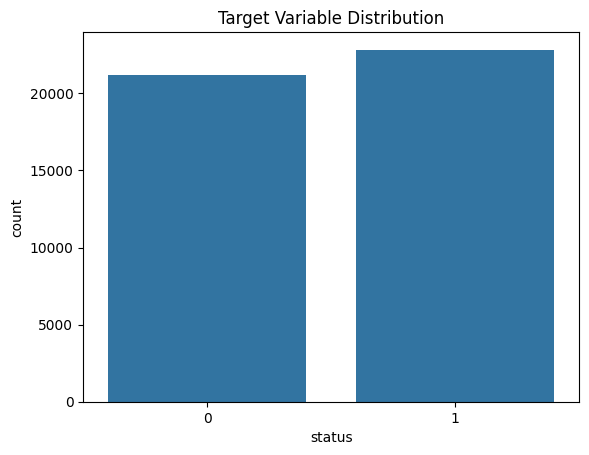

In [ ]:
# Visualizing the Distribution of the Target Variable
sns.countplot(data=data, x='status')
plt.title('Target Variable Distribution')
plt.show()

# **Building the Model**

## **Model Based on Gradient Boost**

In [ ]:
# Hyperparameter Tuning with GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

In [ ]:
xgb = XGBClassifier(random_state=42)
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1],
                         'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1]},
             scoring='accuracy')

In [ ]:
print("Best Hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

Best Hyperparameters: {'colsample_bytree': 1, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}


In [ ]:
# Cross-Validation Score
cv_score = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Score: {np.mean(cv_score):.4f}")

Cross-Validation Score: 0.9756


In [ ]:
# Model Training
best_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Predictions
y_pred = best_model.predict(X_test)

In [ ]:
#Evaluation Metrics
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy Score: 0.9780856137163619

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      4257
           1       0.98      0.98      0.98      4550

    accuracy                           0.98      8807
   macro avg       0.98      0.98      0.98      8807
weighted avg       0.98      0.98      0.98      8807



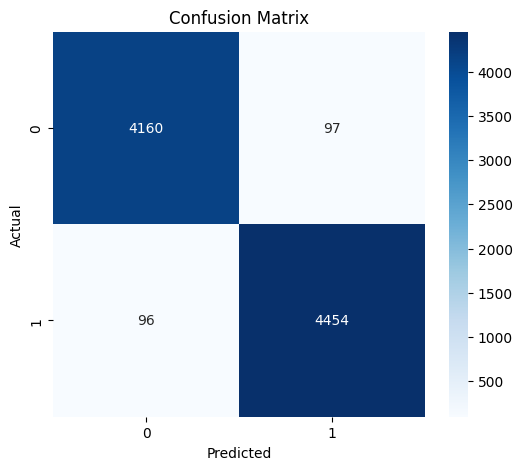

In [ ]:
# Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

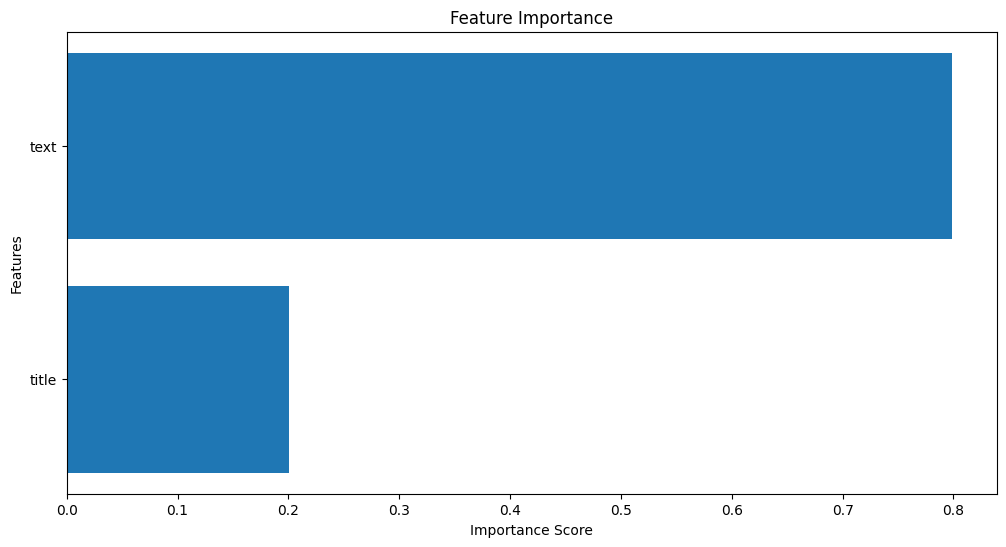

In [ ]:
# Feature Importance Visualization
plt.figure(figsize=(12, 6))
plt.barh(data.columns[:-1], best_model.feature_importances_)  # Replace 'data' with your DataFrame
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

In [ ]:
import joblib

# Saving the Model
joblib.dump(best_model, '/content/drive/MyDrive/Multi-Type-Spam-Detection/news_article_model.pkl')
print("Model Saved Successfully ✅")

# Saving the Scaler (if you're using StandardScaler or MinMaxScaler)
joblib.dump(scaler, '/content/drive/MyDrive/Multi-Type-Spam-Detection/news_article_scaler.pkl')
print("Scaler Saved Successfully ✅")

Model Saved Successfully ✅
Scaler Saved Successfully ✅


In [ ]:
# Loading the Model
best_model_loaded = joblib.load('/content/drive/MyDrive/Multi-Type-Spam-Detection/news_article_model.pkl')
print("Model Loaded Successfully ✅")

# Loading the Scaler
scaler_loaded = joblib.load('/content/drive/MyDrive/Multi-Type-Spam-Detection/news_article_scaler.pkl')
print("Scaler Loaded Successfully ✅")

Model Loaded Successfully ✅
Scaler Loaded Successfully ✅


In [ ]:
import joblib
import numpy as np
import pickle

# Load the saved model, scaler, and encoders
model_path = '/content/drive/MyDrive/Multi-Type-Spam-Detection/news_article_model.pkl'
scaler_path = '/content/drive/MyDrive/Multi-Type-Spam-Detection/news_article_scaler.pkl'
encoder_file_path = '/content/drive/MyDrive/Multi-Type-Spam-Detection/Dataset/news_article_encoder.pkl'

# Load the saved model, scaler, and label encoders
model = joblib.load(model_path)
scaler = joblib.load(scaler_path)

with open(encoder_file_path, 'rb') as file:
    label_encoders = pickle.load(file)

# Preprocessing function (apply the saved encoders)
def preprocess_input(title, text):
    # Apply the corresponding label encoder to the 'title' and 'text' columns
    encoded_title = label_encoders['title'].transform([title])[0]
    encoded_text = label_encoders['text'].transform([text])[0]

    # Combine the encoded features (you can include other features if needed)
    input_features = [encoded_title, encoded_text]

    # Apply the scaler to the input features (assuming scaling was done during training)
    input_features = np.array(input_features).reshape(1, -1)
    input_features = scaler.transform(input_features)

    return input_features

# Get user input
title = input("Enter the title of the news article: ")
text = input("Enter the text of the news article: ")

# Preprocess the input using the preprocess_input function
processed_input = preprocess_input(title, text)

# Ensure the input is in the correct format (NumPy array or DMatrix)
processed_input = np.array(processed_input)

# Make the prediction using the model
prediction = model.predict(processed_input)

# Output the result
if prediction == 0:
    print("This article is NOT spam.")
else:
    print("This article is SPAM.")


Enter the title of the news article: As U.S. budget fight looms, Republicans flip their fiscal script
Enter the text of the news article: WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a â€œfiscal conservativeâ€ on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBSâ€™ â€œFace the Nation,â€ drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget incre

ValueError: y contains previously unseen labels: 'WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a â€œfiscal conservativeâ€\x9d on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBSâ€™ â€œFace the Nation,â€\x9d drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense â€œdiscretionaryâ€\x9d spending on programs that support education, scientific research, infrastructure, public health and environmental protection. â€œThe (Trump) administration has already been willing to say: â€˜Weâ€™re going to increase non-defense discretionary spending ... by about 7 percent,â€™â€\x9d Meadows, chairman of the small but influential House Freedom Caucus, said on the program. â€œNow, Democrats are saying thatâ€™s not enough, we need to give the government a pay raise of 10 to 11 percent. For a fiscal conservative, I donâ€™t see where the rationale is. ... Eventually you run out of other peopleâ€™s money,â€\x9d he said. Meadows was among Republicans who voted in late December for their partyâ€™s debt-financed tax overhaul, which is expected to balloon the federal budget deficit and add about $1.5 trillion over 10 years to the $20 trillion national debt. â€œItâ€™s interesting to hear Mark talk about fiscal responsibility,â€\x9d Democratic U.S. Representative Joseph Crowley said on CBS. Crowley said the Republican tax bill would require the  United States to borrow $1.5 trillion, to be paid off by future generations, to finance tax cuts for corporations and the rich. â€œThis is one of the least ... fiscally responsible bills weâ€™ve ever seen passed in the history of the House of Representatives. I think weâ€™re going to be paying for this for many, many years to come,â€\x9d Crowley said. Republicans insist the tax package, the biggest U.S. tax overhaul in more than 30 years,  will boost the economy and job growth. House Speaker Paul Ryan, who also supported the tax bill, recently went further than Meadows, making clear in a radio interview that welfare or â€œentitlement reform,â€\x9d as the party often calls it, would be a top Republican priority in 2018. In Republican parlance, â€œentitlementâ€\x9d programs mean food stamps, housing assistance, Medicare and Medicaid health insurance for the elderly, poor and disabled, as well as other programs created by Washington to assist the needy. Democrats seized on Ryanâ€™s early December remarks, saying they showed Republicans would try to pay for their tax overhaul by seeking spending cuts for social programs. But the goals of House Republicans may have to take a back seat to the Senate, where the votes of some Democrats will be needed to approve a budget and prevent a government shutdown. Democrats will use their leverage in the Senate, which Republicans narrowly control, to defend both discretionary non-defense programs and social spending, while tackling the issue of the â€œDreamers,â€\x9d people brought illegally to the country as children. Trump in September put a March 2018 expiration date on the Deferred Action for Childhood Arrivals, or DACA, program, which protects the young immigrants from deportation and provides them with work permits. The president has said in recent Twitter messages he wants funding for his proposed Mexican border wall and other immigration law changes in exchange for agreeing to help the Dreamers. Representative Debbie Dingell told CBS she did not favor linking that issue to other policy objectives, such as wall funding. â€œWe need to do DACA clean,â€\x9d she said.  On Wednesday, Trump aides will meet with congressional leaders to discuss those issues. That will be followed by a weekend of strategy sessions for Trump and Republican leaders on Jan. 6 and 7, the White House said. Trump was also scheduled to meet on Sunday with Florida Republican Governor Rick Scott, who wants more emergency aid. The House has passed an $81 billion aid package after hurricanes in Florida, Texas and Puerto Rico, and wildfires in California. The package far exceeded the $44 billion requested by the Trump administration. The Senate has not yet voted on the aid. '